In [29]:
# streamlit==1.44.1
# pandas==2.2.3
# scikit-learn==1.6.1
# nltk==3.9.1
# joblib==1.4.2

pip install -r requirements.txt
cd src
python preprocess.py
streamlit run main.py

In [1]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("notshrirang/spotify-million-song-dataset")

print("Path to dataset files:", path)

100%|██████████| 20.7M/20.7M [00:01<00:00, 18.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/notshrirang/spotify-million-song-dataset/versions/1


In [3]:
!ls

drive  sample_data


In [5]:
df = pd.read_csv(path+"/spotify_millsongdata.csv")

In [6]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [7]:
df.shape

(57650, 4)

In [8]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [10]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [11]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [12]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [13]:


df.shape



(10000, 3)

In [14]:


df.head()



,artist,song,text
0,Children,Camp Menzies,Were up at Camp Menzies. The camp of \r\nOur ...
1,Michael W. Smith,Color Blind,There's not a world of difference \r\nOut in ...
2,Roy Orbison,Crawling Back,Only you and no one else \r\nCan keep me craw...
3,Our Lady Peace,Made Of Steel,I can be anything \r\nThat you want me to be ...
4,Underworld,Change The Weather,Look at these eyes admit that you're killing m...


In [15]:

# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

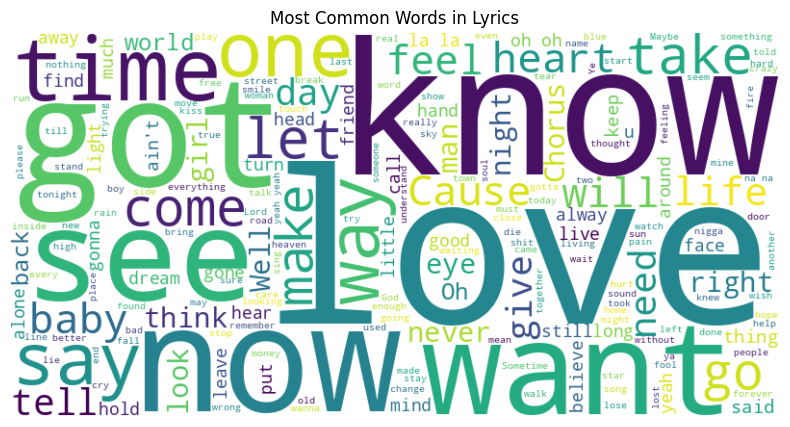

In [16]:

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

In [17]:


# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [20]:


# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)



In [21]:
df.head()


,artist,song,text,cleaned_text
0,Children,Camp Menzies,Were up at Camp Menzies. The camp of \r\nOur ...,camp menzies camp dreams streams let ender spa...
1,Michael W. Smith,Color Blind,There's not a world of difference \r\nOut in ...,theres world difference world tonight world pe...
2,Roy Orbison,Crawling Back,Only you and no one else \r\nCan keep me craw...,one else keep crawling back know cant help im ...
3,Our Lady Peace,Made Of Steel,I can be anything \r\nThat you want me to be ...,anything want punching bag piece string remind...
4,Underworld,Change The Weather,Look at these eyes admit that you're killing m...,look eyes admit youre killing never see damage...


In [22]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [23]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [24]:


# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]



In [28]:
df["song"][5]

'Her Only Bad Habit Is Me'

In [27]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("Crawling Back") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
             artist                       song
1177     Elton John             Come Back Baby
6012   Taylor Swift       Come Back... Be Here
9266  Cliff Richard  Climbing Up Mount Everest
674        Fabolous               The Get Back
8757           Kyla    Love Will Lead You Back
